<a href="https://colab.research.google.com/github/muskan-cloud/Pytorch_deeplearning/blob/main/03_computer_vision_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch libraries for computer vision

* `torchvision`
* `torchvision.datasets`
* `torchvision.models`
* `torchvision.transforms`
* `torch.utils.data.Dataset`
* `torch.util.data.DataLoader`



In [ ]:
# importattion

import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## 1.getting a dataset

`Fashion.MNIST`

In [ ]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download = True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
image,label = train_data[0]
image[0].shape,image.shape #greyscale images have one color channekl (color channel,height,width)

(torch.Size([28, 28]), torch.Size([1, 28, 28]))

In [ ]:
label

9

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## visualizing our data

image_shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

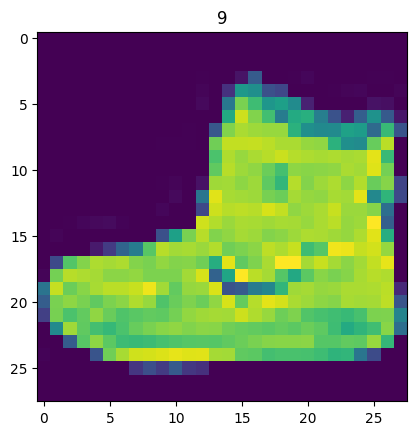

In [ ]:
image,label = train_data[0]
print(f"image_shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

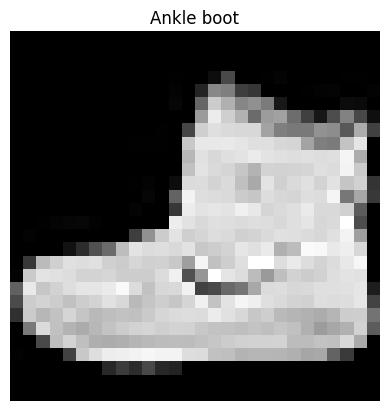

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

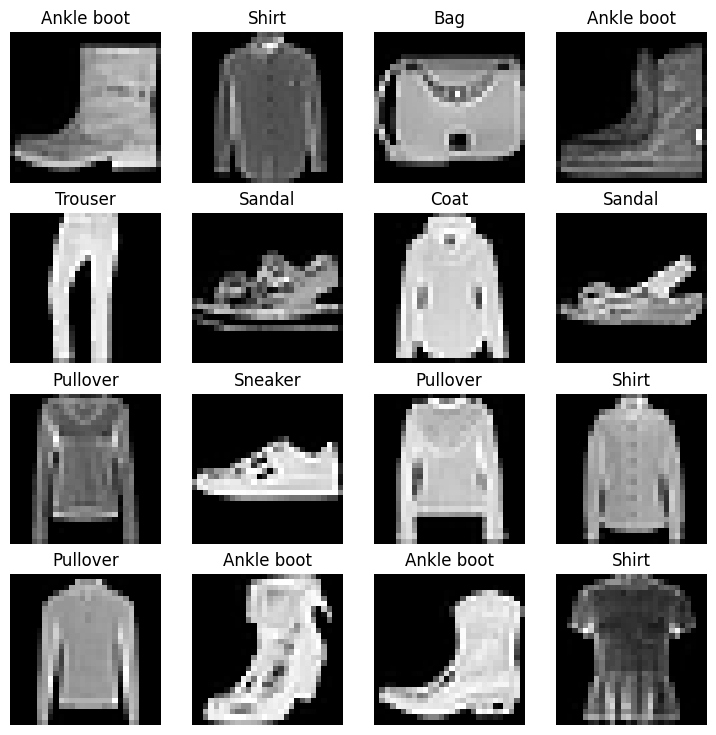

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [ ]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## prepare dataloader
* dataloader turns Pytorch datasets into a python iterable

* we will turn our data into batches/mini-batches.

* coz it is computationally efficient as in our computing hardware may not be able to look(store in memory 60k images) so (we break 60000 images into batches of 32 images)

* it gives our neural network more chances to update its gradients per epoch.





In [ ]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data,batch_size = BATCH_SIZE,shuffle = True)

test_dataloader = DataLoader(dataset = test_data,batch_size = BATCH_SIZE,shuffle = True)

train_dataloader ,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7edebc3d8d90>,
 <torch.utils.data.dataloader.DataLoader at 0x7edf56d262f0>)

In [ ]:
print(f"DataLoaders: {train_dataloader ,test_dataloader}")
print(f"length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7edebc3d8d90>, <torch.utils.data.dataloader.DataLoader object at 0x7edf56d262f0>)
length of train dataloader: 1875 batches of 32
length of test dataloader: 313 batches of 32


In [ ]:
# check what's inside the training dataloader
train_features_batch,train_labels_batch =next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6,label size: torch.Size([])


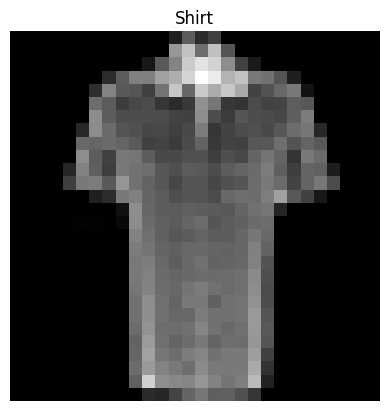

In [ ]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {image.shape}")
print(f"Label: {label},label size: { label.shape }")

## Model_0 build a baseline model

In [ ]:
flatten_model = nn.Flatten()
x=train_features_batch[0]
output = flatten_model(x)
x.shape,output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features = output_shape)
    )

  def forward(self,x):
      return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape = 784,#28*28
    hidden_units = 10,
    output_shape = len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Loss function and optimzer,eval metrics

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists !,skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)


helper_functions.py already exists !,skipping download


In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.1)

## creating a function to time our experiments

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}:{total_time : .3f} seconds")
  return total_time

In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start = start_time,end = end_time,device = "cpu")

Train time on cpu: 0.000 seconds


5.6476999816368334e-05

### creating a training loop and training a model on batches of data

* Loop through epochs
* Loop through training batches, perform training steps,calculate the train loss *per batch*
* Loop through test batches, perform training steps,calculate the test loss *per batch*
* print what's happening
* time it all(for fun).

In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs(for faster training training time)
epochs = 3

# create a training and test loops
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  ### training
  train_loss = 0
  # add a loop to loop through training batches
  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1 forward pass
    y_pred = model_0(X)

    # 2.calculate the loss(per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss #accumalate train loss

    # 3.optimzer zero grad
    optimizer.zero_grad()

    # 4.loss backward
    loss.backward()

    # 5.Optimzer step
    optimizer.step()

    # print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1.Forward pass
      test_pred = model_0(X_test)

      # 2.Calculate loss(accumalatively)
      test_loss += loss_fn(test_pred,y_test)

      # 3.calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred = test_pred.argmax(dim=1))

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

  # print out what's happening
  print(f"\nTrain loss: {train_loss: .4f} | test loss: {test_loss:.4f} | test accuracy: {test_acc:.4f} %")

# calculate train time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))






  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.5904 | test loss: 0.5102 | test accuracy: 82.0387 %
Epoch: 1
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.4743 | test loss: 0.5268 | test accuracy: 81.6793 %
Epoch: 2
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.4537 | test loss: 0.5126 | test accuracy: 82.9972 %
Train time on cpu: 27.225 seconds


## Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    # scale the loss and acc to find the average loss/acc per batch
    loss/= len(data_loader)
    acc/= len(data_loader)

  return {"model_name" : model.__class__.__name__,
          "model_loss" : loss.item(),
          "model_acc" : acc}

# calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                               data_loader=test_dataloader,
                               loss_fn = loss_fn,
                               accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

##Setup device agnoustic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Building a better model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
          input_shape: int,
          hidden_units: int,
          output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,out_features = output_shape),
    )

  def forward(self,x):
    return self.layer_stack(x)




In [ ]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_shape = 784,#28*28
    hidden_units = 10,
    output_shape = len(class_names)).to(device)


next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
dummy_x = (torch.rand([1,1,28,28])).to(device)
model_1(dummy_x)

tensor([[ 0.1649,  0.1648, -0.1237, -0.1689,  0.0117,  0.1283, -0.3362,  0.1640,
          0.2032, -0.2798]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),lr=0.1)

## Functionizing training and evaluation/testing loops

In [ ]:
def train_step(model : torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  ### training
  train_loss = 0
  train_acc = 0

  # put model in training mode
  model.train()

  # add a loop to loop through training batches
  for batch,(X,y) in enumerate(train_dataloader):
    # put data on taget device
    X,y = X.to(device),y.to(device)

    # 1.forward pass
    y_pred = model(X)

    # 2.calculate the loss(per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss #accumalate train loss
    train_acc += accuracy_fn(y_true =y ,y_pred = y_pred.argmax(dim=1))

    # 3.optimzer zero grad
    optimizer.zero_grad()

    # 4.loss backward
    loss.backward()

    # 5.Optimzer step
    optimizer.step()

  # Divide total train loss and accuracy by length of train dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)
  # print out what's happening
  print(f"Train Loss: {train_loss: .5f} | Train Accuracy: { train_acc: .2f} %")


In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """ performs a testing loop step on model going over data_loader."""
  test_loss,test_acc = 0, 0

  # put the model in eval_mode
  model.eval()
  # turn on inference mode
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device),y.to(device)

      # 1.Forward pass
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true = y,y_pred=test_pred.argmax(dim=1))

    # adjust metrics and print out
    test_loss/= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss:{test_loss} | Test accuracy: {test_acc} % \n")

In [ ]:
torch.manual_seed(42)
# Measure time
from timeit import default_timer as timer

train_time_start_on_gpu = timer()
epochs =3

# create an optimzation loo[]
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n--------")
  train_step(model = model_1,
             dataloader = train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,end=train_time_end_on_gpu,device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
--------
Train Loss:  0.66768 | Train Accuracy:  75.88 %
Test Loss:0.5013667345046997 | Test accuracy: 82.08865814696486 % 

Epoch:1
--------
Train Loss:  0.48266 | Train Accuracy:  82.67 %
Test Loss:0.48656952381134033 | Test accuracy: 82.76757188498402 % 

Epoch:2
--------
Train Loss:  0.44946 | Train Accuracy:  83.77 %
Test Loss:0.4760434627532959 | Test accuracy: 83.55630990415335 % 

Train time on cuda: 30.516 seconds


In [ ]:
total_train_time_model_1

30.516341483999895

In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y = X.to(device),y.to(device)
      # make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    # scale the loss and acc to find the average loss/acc per batch
    loss/= len(data_loader)
    acc/= len(data_loader)

  return {"model_name" : model.__class__.__name__,
          "model_loss" : loss.item(),
          "model_acc" : acc}

In [ ]:
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn= accuracy_fn,
                             )

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_1_results,model_0_results

({'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.47543802857398987,
  'model_acc': 83.56629392971246},
 {'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.512529730796814,
  'model_acc': 83.00718849840256})

## Building a CNN

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x



In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,
                       hidden_units = 10,
                       output_shape = len(class_names)).to(device)

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
random_image_tensor = torch.randn(size=(1,28,28))
random_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(random_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Stepping through Conv2d

In [ ]:
torch.manual_seed(42)
# create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image Batch size : { images.shape }")
print(f"Single Image size : { images[0].shape }")
print(f"test Image size : { test_image.shape }")

Image Batch size : torch.Size([32, 3, 64, 64])
Single Image size : torch.Size([3, 64, 64])
test Image size : torch.Size([3, 64, 64])


In [ ]:
torch.manual_seed(42)
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels = 3,
              out_channels = 10,
              kernel_size = 3,
              stride =1,
              padding =0)
# pass the data through convulution laYer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

### Steps for stepping through Maxpool2d

In [ ]:
# Print out original image shape without unsqueezed dimension
print(f"test Image original shape : { test_image.shape }")
print(f"test Image with unsqueezed dimension : { test_image.unsqueeze(0).shape }")

# create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"shape after conv layer:{test_image_through_conv.shape}")

test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f"shape after maxpool and conv layer:{test_image_through_conv_and_maxpool.shape}")


test Image original shape : torch.Size([3, 64, 64])
test Image with unsqueezed dimension : torch.Size([1, 3, 64, 64])
shape after conv layer:torch.Size([1, 10, 62, 62])
shape after maxpool and conv layer:torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
random_tensor = torch.randn(size = (1,1,2,2))
print(f"\nRandom tensor: \n {random_tensor}")
print(f"\nRandom tensor shape: \n {random_tensor.shape}")

# create a maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# pass the random_tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor: \n {max_pool_tensor}")
print(f"\nMax pool tensor shape: \n {max_pool_tensor.shape}")



Random tensor: 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random tensor shape: 
 torch.Size([1, 1, 2, 2])

Max pool tensor: 
 tensor([[[[0.3367]]]])

Max pool tensor shape: 
 torch.Size([1, 1, 1, 1])


### setup loss function and optimizer for `model_2`

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr=0.1)

### Training and testing `model_2` using our training and test functions.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# train and test model
epochs = 10
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model=model_2,
             dataloader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model=model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                              end = train_time_end_model_2,
                                              device = device)



  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
----------
Train Loss:  0.58813 | Train Accuracy:  78.64 %
Test Loss:0.39547255635261536 | Test accuracy: 86.13218849840256 % 

Train time on cuda: 12.141 seconds
Epoch: 1
----------
Train Loss:  0.36128 | Train Accuracy:  86.98 %
Test Loss:0.37385812401771545 | Test accuracy: 87.16054313099042 % 

Train time on cuda: 23.897 seconds
Epoch: 2
----------
Train Loss:  0.32484 | Train Accuracy:  88.34 %
Test Loss:0.3382253050804138 | Test accuracy: 87.94928115015975 % 

Train time on cuda: 35.337 seconds
Epoch: 3
----------
Train Loss:  0.30517 | Train Accuracy:  89.03 %
Test Loss:0.3134198784828186 | Test accuracy: 89.1373801916933 % 

Train time on cuda: 47.089 seconds
Epoch: 4
----------
Train Loss:  0.29156 | Train Accuracy:  89.46 %
Test Loss:0.3028079867362976 | Test accuracy: 88.82787539936102 % 

Train time on cuda: 58.772 seconds
Epoch: 5
----------
Train Loss:  0.27907 | Train Accuracy:  89.80 %
Test Loss:0.3132789731025696 | Test accuracy: 89.04752396166134 % 

Train ti

In [ ]:
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn)


model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2843099534511566,
 'model_acc': 89.58666134185303}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

## Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.512530,83.007188
1,FashionMNISTModelV1,0.475438,83.566294
2,FashionMNISTModelV2,0.284310,89.586661


In [ ]:
# add training time in results comparision
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.512530,83.007188,27.225354
1,FashionMNISTModelV1,0.475438,83.566294,30.516341
2,FashionMNISTModelV2,0.284310,89.586661,118.932911


Text(0, 0.5, 'model')

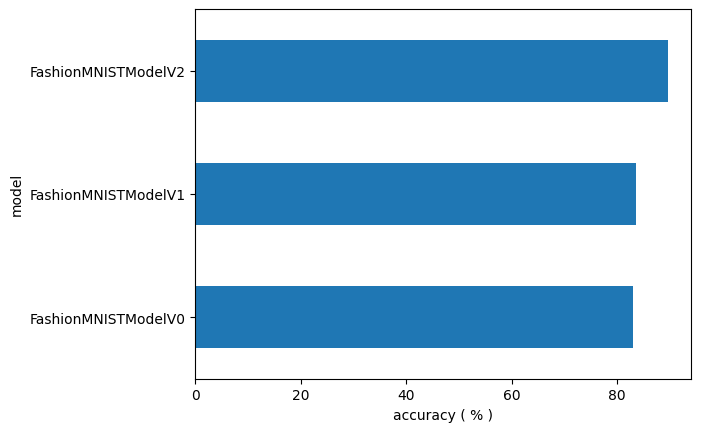

In [ ]:
# visualise our model results
compare_results.set_index("model_name")["model_acc"].plot(kind ="barh")
plt.xlabel("accuracy ( % )")
plt.ylabel("model")

## Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device:torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample
      sample = torch.unsqueeze(sample,dim =0).to(device)

      # forward pass
      pred_logit = model_2(sample)

      # get predictions probability
      pred_prob = torch.softmax(pred_logit.squeeze(),dim = 0)

      # get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)



In [ ]:
img, label = test_data[0][:10]
img.shape,label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view first sampleshape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

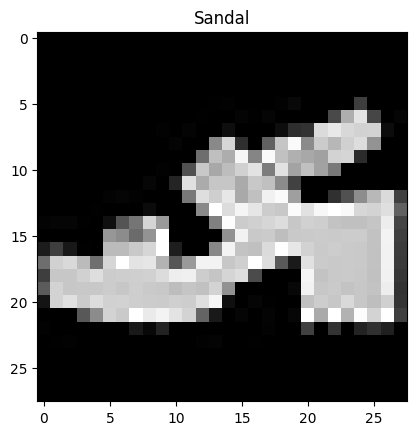

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap = "gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model= model_2,
                              data = test_samples)


In [ ]:
# convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 1, 7, 4, 3, 6, 4, 7, 1])

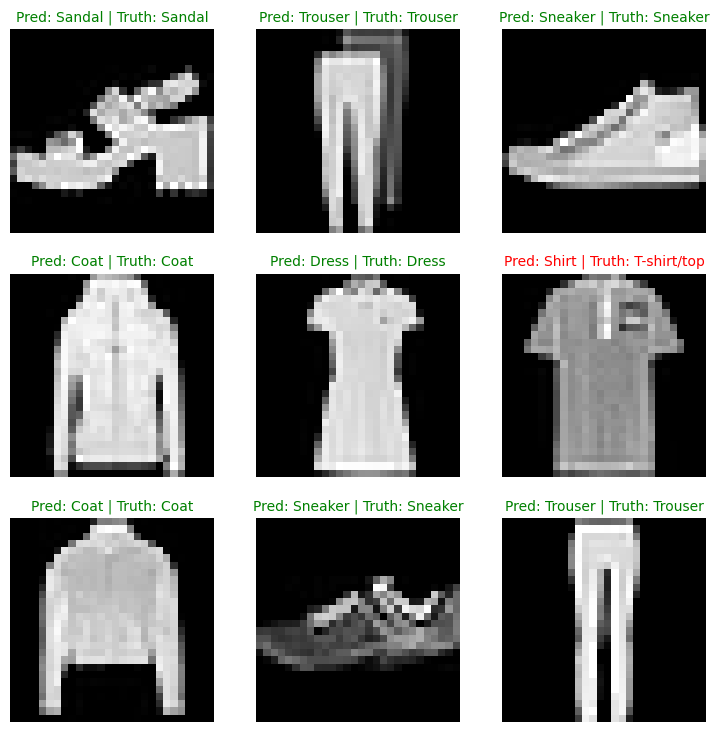

In [ ]:
# plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i,sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows,ncols,i+1)

  # plot the target image
  plt.imshow(sample.squeeze(),cmap = "gray")

  # Find the prediction( in text form , eg "sandal")
  pred_label = class_names[pred_classes[i]]

  # get the truth label ( in text label )
  truth_label = class_names[test_labels[i]]

  # create a title for the plot
  title_text = f"Pred: { pred_label } | Truth: { truth_label }"

  # check for equality between pred and truth and change color of title text.
  if pred_label == truth_label :
    plt.title(title_text, fontsize = 10, c = "g")
  else:
    plt.title(title_text, fontsize = 10, c="r")

  plt.axis(False)

## Making a confusion metrics for further prediction evaluation

* Make predictions with our trained model on the test dataset
* make a confusion matrix `torchmetrics.ConfusionMatrix`
* plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
from tqdm.auto import tqdm

# make predictions with trained_label
y_preds_cnn = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc = "Making predictions ....."):
    # send the data and targets to target device
    X , y = X.to(device) , y.to(device)

    # do the forward pass
    y_logit = model_2(X)

    # turn predictions from logits -> pred_probs -> pred_labels
    y_pred_cnn = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)

    # Put prediction on CPU for level
    y_preds_cnn.append(y_pred_cnn.cpu())

# concatenate list of predictions into a tensor
# print(y_preds)
y_pred_cnn_tensor = torch.cat(y_preds_cnn)
y_pred_cnn_tensor,y_pred_cnn_tensor.shape

Making predictions .....:   0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 7, 9,  ..., 3, 1, 8]), torch.Size([10000]))

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [ ]:
import mlxtend
mlxtend.__version__

'0.23.1'

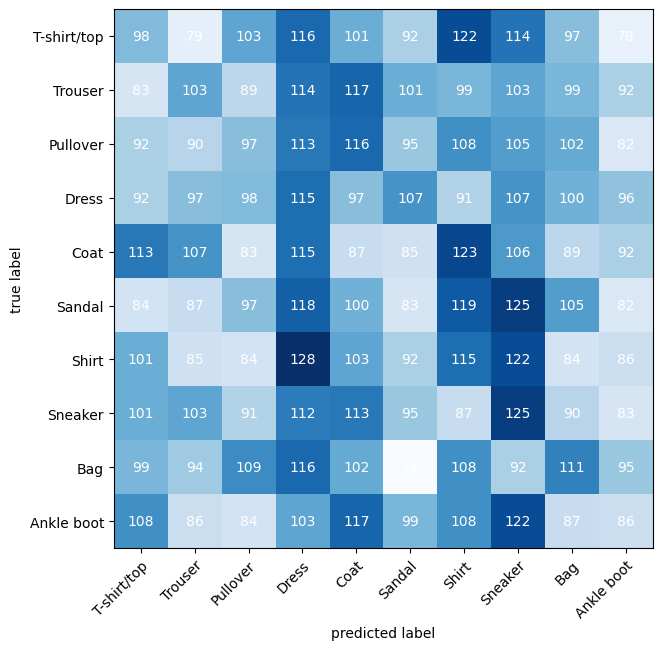

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_cnn_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [ ]:
from pathlib import Path

# create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)

# create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# save the model state dict
print(f"Saving model to : { MODEL_SAVE_PATH }")
torch.save(obj = model_2.state_dict(),f=MODEL_SAVE_PATH)

Saving model to : models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape = 1,
                                  hidden_units = 10,
                                  output_shape = len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.28502941131591797,
 'model_acc': 89.56669329073482}

In [ ]:
# check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),atol=1e-1)

tensor(True)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2843099534511566,
 'model_acc': 89.58666134185303}